In [273]:
# import sys to get more detailed Python exception info
import sys

# Import PIL for wine bottle
from PIL import Image

# import Wordcloud 
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

# import the connect library for psycopg2
import psycopg2

# import the error handling libraries for psycopg2
from psycopg2 import OperationalError, errorcodes, errors
import psycopg2.extras as extras
import pandas as pd
import numpy as np

In [274]:
!cp "wine_mask2.png" "wine_mask.png"

In [275]:
# Note: please change your database, username & password as per your own values
conn_params_dic = {
    "host"      : "192.168.1.9",
    "database"  : "jobs",
    "user"      : "user3",
    "password"  : "password3"
}

In [276]:
def connect(conn_params_dic):
    conn = None
    try:
        print('Connecting to the PostgreSQL...........')
        conn = psycopg2.connect(**conn_params_dic)
        print("Connected successfully..................")
        
    except OperationalError as err:
        # passing exception to function
        show_psycopg2_exception(err)        
        # set the connection to 'None' in case of error
        conn = None
    return conn

conn = connect(conn_params_dic)

Connecting to the PostgreSQL...........
Connected successfully..................


In [277]:
# Define postgresql_to_dataframe function to load data into a pandas # dataframe
def postgresql_to_dataframe(conn, sql, col_names):
    cursor = conn.cursor()
    try:
        cursor.execute(sql)
    except (Exception, psycopg2.DatabaseError) as err:
        # passing exception to function
        show_psycopg2_exception(err)      
    
    # Naturally we get a list of tupples
    tuples = cursor.fetchall()
    cursor.close()
    
    # We just need to turn it into a pandas dataframe
    df = pd.DataFrame(tuples, columns=col_names)
    return df



In [278]:
sql = '''select url, description from listings'''
col_names = ['url','description']

df = postgresql_to_dataframe(conn, sql, col_names)

jd = df

['Jooble - Software Engineer (Crawling/Reverse engineering)FindLog inVacancy 1 from 5Software Engineer (Crawling/Reverse engineering)$1,000 per monthFul'
 'Jooble - Senior Software Engineer, AutomationsFindLog inVacancy 5 from 5Product AnalystFull-timetheUp.coRemoteRemote job Product Analyst\xa0 You will wor'
 "Jooble - Product AnalystFindLog inVacancy 4 from 5Principal Software Engineer - Python, Django, ReactRemoteHubRemoteRemote job  Our clients' competiti"
 'Jooble - Principal Software Engineer - Python, Django, ReactFindLog inVacancy 3 from 5Senior Data Scientist, Healthier LivesFull-timeCera CareRemoteRe'
 'Jooble - Senior Data Scientist, Healthier LivesFindLog inVacancy 2 from 5Software Engineer (Crawling/Reverse engineering)$1,000 per monthFull-timeRemo'
 'Redirecting...'
 'Jooble - Application/Solution ArchitectFindLog inVacancy 20 from 20Informatica (IICS) Consultant£40k - £70k per annumFull-timeAmber LabsRemoteRemote j'
 'Jooble - Informatica (IICS) ConsultantFindLog inVacan

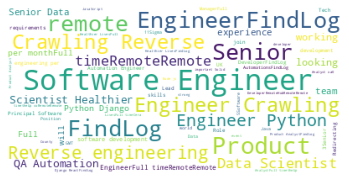

In [279]:


stopwords = set(STOPWORDS)
stopwords.update(['Jooble', 'inVacancy','Vacancy', 'Jobs', 'jobs', 'job'])

text = df['description'].values

print(text)
#wordcloud = WordCloud().generate(str(text))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(str(text))

plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [280]:
wine_mask = np.array(Image.open("wine_mask.png"))
wine_mask

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [281]:
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
      
# Transform your mask into a new one that will work with the function:
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

for i in range(len(wine_mask)):
    transformed_wine_mask[i] = list(map(transform_format, wine_mask[i]))
# Check the expected result of your mask
transformed_wine_mask

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=int32)

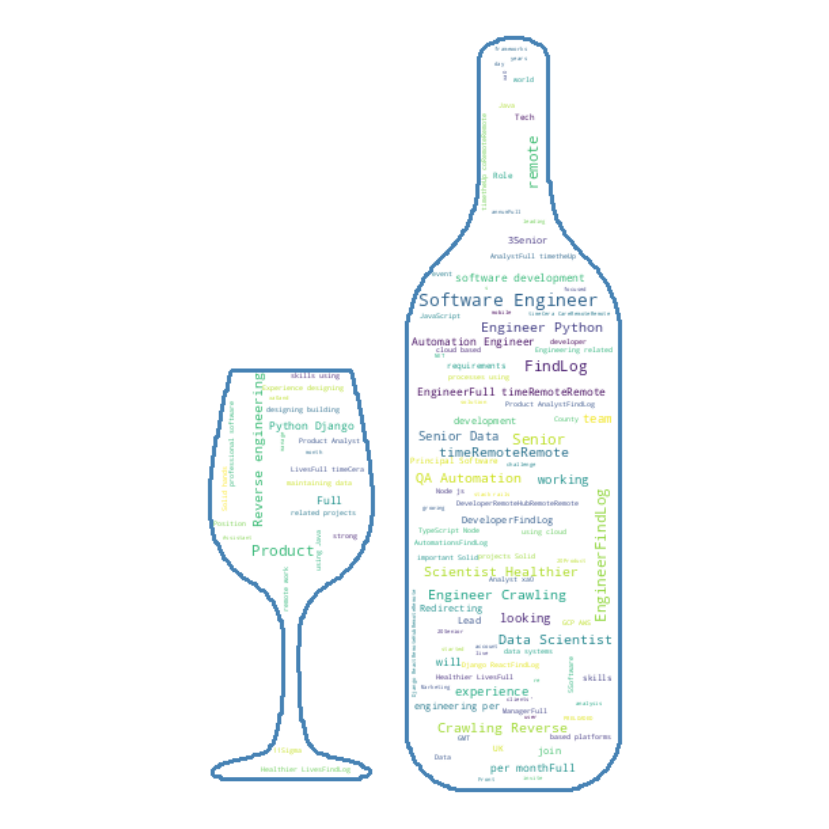

<Figure size 432x288 with 0 Axes>

In [282]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=500, mask=transformed_wine_mask,
               stopwords=stopwords, contour_width=2, contour_color='steelblue')

# Generate a wordcloud
wc.generate(str(text))

# store to file
wc.to_file("wine_mask.png")

# show
plt.figure(figsize=[30,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.savefig("wine_mask.png")

In [283]:
## https://thecleverprogrammer.com/2020/07/19/wordcloud-with-python/

In [284]:
!mv "wine_mask.png" "wine_mask_wc.png"